<a href="https://colab.research.google.com/github/ShibuGitB/CognoRise_InfoTech/blob/main/Task_2_CognoRise_Infotech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Importing Necessary Packages***

In [ ]:
import pandas as pd
import nltk
from nltk import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

***Dataset***

In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/Task 2 CognoRise/IMDB Dataset.csv",nrows=25000)
dataset

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
24995,This movie was a real torture fest to sit thro...,negative
24996,John Wayne & Albert Dekker compete for oil rig...,negative
24997,Tarantino once remarked on a melodrama from th...,positive
24998,Aah yes the workout show was a great. Not only...,positive


In [ ]:
dataset["sentiment"].value_counts()

sentiment
negative    12526
positive    12474
Name: count, dtype: int64

***Ratio of Positive & Negative Reviews***

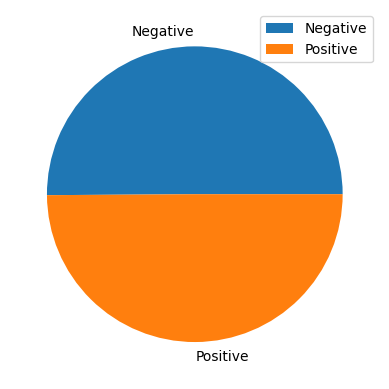

In [ ]:
x=[12526,12474]
y=["Negative","Positive"]

plt.pie(x=x,labels=y)
plt.legend()

***Checking the Datatype of dataset Values***

In [ ]:
dataset.dtypes

review       object
sentiment    object
dtype: object

***Checking is there any missing values or not***

In [ ]:
dataset.isna().sum()

review       0
sentiment    0
dtype: int64

***Taking Input***

In [ ]:
input=dataset.iloc[:,0]
input

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
24995    This movie was a real torture fest to sit thro...
24996    John Wayne & Albert Dekker compete for oil rig...
24997    Tarantino once remarked on a melodrama from th...
24998    Aah yes the workout show was a great. Not only...
24999    This film should have never been made. Honestl...
Name: review, Length: 25000, dtype: object

***Applying Natural Language Processing to Input***

In [ ]:
input=input.str.replace("[a-zA-Z0-9 ]","")

In [ ]:
tokenizer=TweetTokenizer()

In [ ]:
nltk.download("stopwords")
stop=stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stemmer=SnowballStemmer("english")

In [ ]:
input=input.apply(lambda i:[stemmer.stem(j.lower()) for j in tokenizer.tokenize(i) if j not in stop]).apply(lambda j:" ".join(j))

In [ ]:
vectorizer=TfidfVectorizer()
vectorizer.fit(input)
input=vectorizer.transform(input)

***Converting output natural language to numerical value by Label Encoder***

In [ ]:
output=dataset.iloc[:,1]
output

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
24995    negative
24996    negative
24997    positive
24998    positive
24999    negative
Name: sentiment, Length: 25000, dtype: object

In [ ]:

encoder=LabelEncoder()
encoder.fit(output)
output=encoder.transform(output)

***Taking input & output for Training & Testing***

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(input,output,test_size=0.3,random_state=1)

***Checking all the possible algorithms and creating models and checking accuracy of that***

In [ ]:
model1=KNeighborsClassifier(n_neighbors=3)
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)

In [ ]:
print (accuracy_score(y_test,y_pred1))

0.7516


In [ ]:
model4=DecisionTreeClassifier(criterion="entropy")
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)

In [ ]:
print (accuracy_score(y_test,y_pred4))

0.7077333333333333


In [ ]:
model5=RandomForestClassifier(criterion="entropy")
model5.fit(x_train,y_train)
y_pred5=model5.predict(x_test)

In [ ]:
print (accuracy_score(y_test,y_pred5))

0.8493333333333334


In [ ]:
model6=AdaBoostClassifier()
model6.fit(x_train,y_train)
y_pred6=model6.predict(x_test)

In [ ]:
print (accuracy_score(y_test,y_pred6))

0.8042666666666667


In [ ]:
model7=XGBClassifier()
model7.fit(x_train,y_train)
y_pred7=model7.predict(x_test)

In [ ]:
print (accuracy_score(y_test,y_pred7))

0.8428


***Tooks a better a accuracy model from Support Vector Classifiers with almost accuracy of 88% and choosed that for the prediction***

In [ ]:
model2=SVC(kernel="linear")
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)

In [ ]:
print (accuracy_score(y_test,y_pred2))

0.8825333333333333


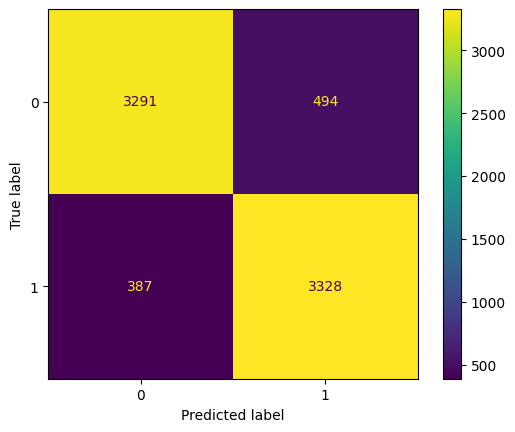

In [ ]:
print (ConfusionMatrixDisplay.from_predictions(y_test,y_pred2))

In [ ]:
print (classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      3785
           1       0.87      0.90      0.88      3715

    accuracy                           0.88      7500
   macro avg       0.88      0.88      0.88      7500
weighted avg       0.88      0.88      0.88      7500



***Prediction the output by a sample input***


In [ ]:
prediction=model2.predict(vectorizer.transform(["excellent movie"]))
prediction=encoder.inverse_transform(prediction)
print ("Reviewer rated this movie as,",prediction.item())

Reviewer rated this movie as, positive
